In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/car_price_prediction.csv.zip')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [ ]:
df['Wheel'].value_counts()

,count
Wheel,
Left wheel,17753
Right-hand drive,1484


In [ ]:
df.drop(columns='Doors', inplace=True)

In [ ]:
df[['Levy']] = df[['Levy']].replace('-', np.nan)
df['Levy']=df['Levy'].fillna(method='ffill').fillna(method='bfill')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [ ]:
df[['Engine volume', 'Mileage', 'Cylinders','Wheel']] = df[['Engine volume', 'Mileage', 'Cylinders','Wheel']].astype(str)

df['Leather interior'] = df['Leather interior'].replace({'Yes': 1, 'No': 0})

df['Engine volume'] = df['Engine volume'].str.split().str[0].astype(float)
df['Mileage'] = df['Mileage'].str.split().str[0].astype(float).astype(int)

df['Cylinders'] = df['Cylinders'].astype(float).astype(int)

df['Levy']= df['Levy'].fillna(method='ffill').fillna(method='bfill')

In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,1018,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,1055,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4,Manual,Rear,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4,Tiptronic,Front,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4,Automatic,Front,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4,Automatic,Front,Left wheel,Black,4


Data Visualization

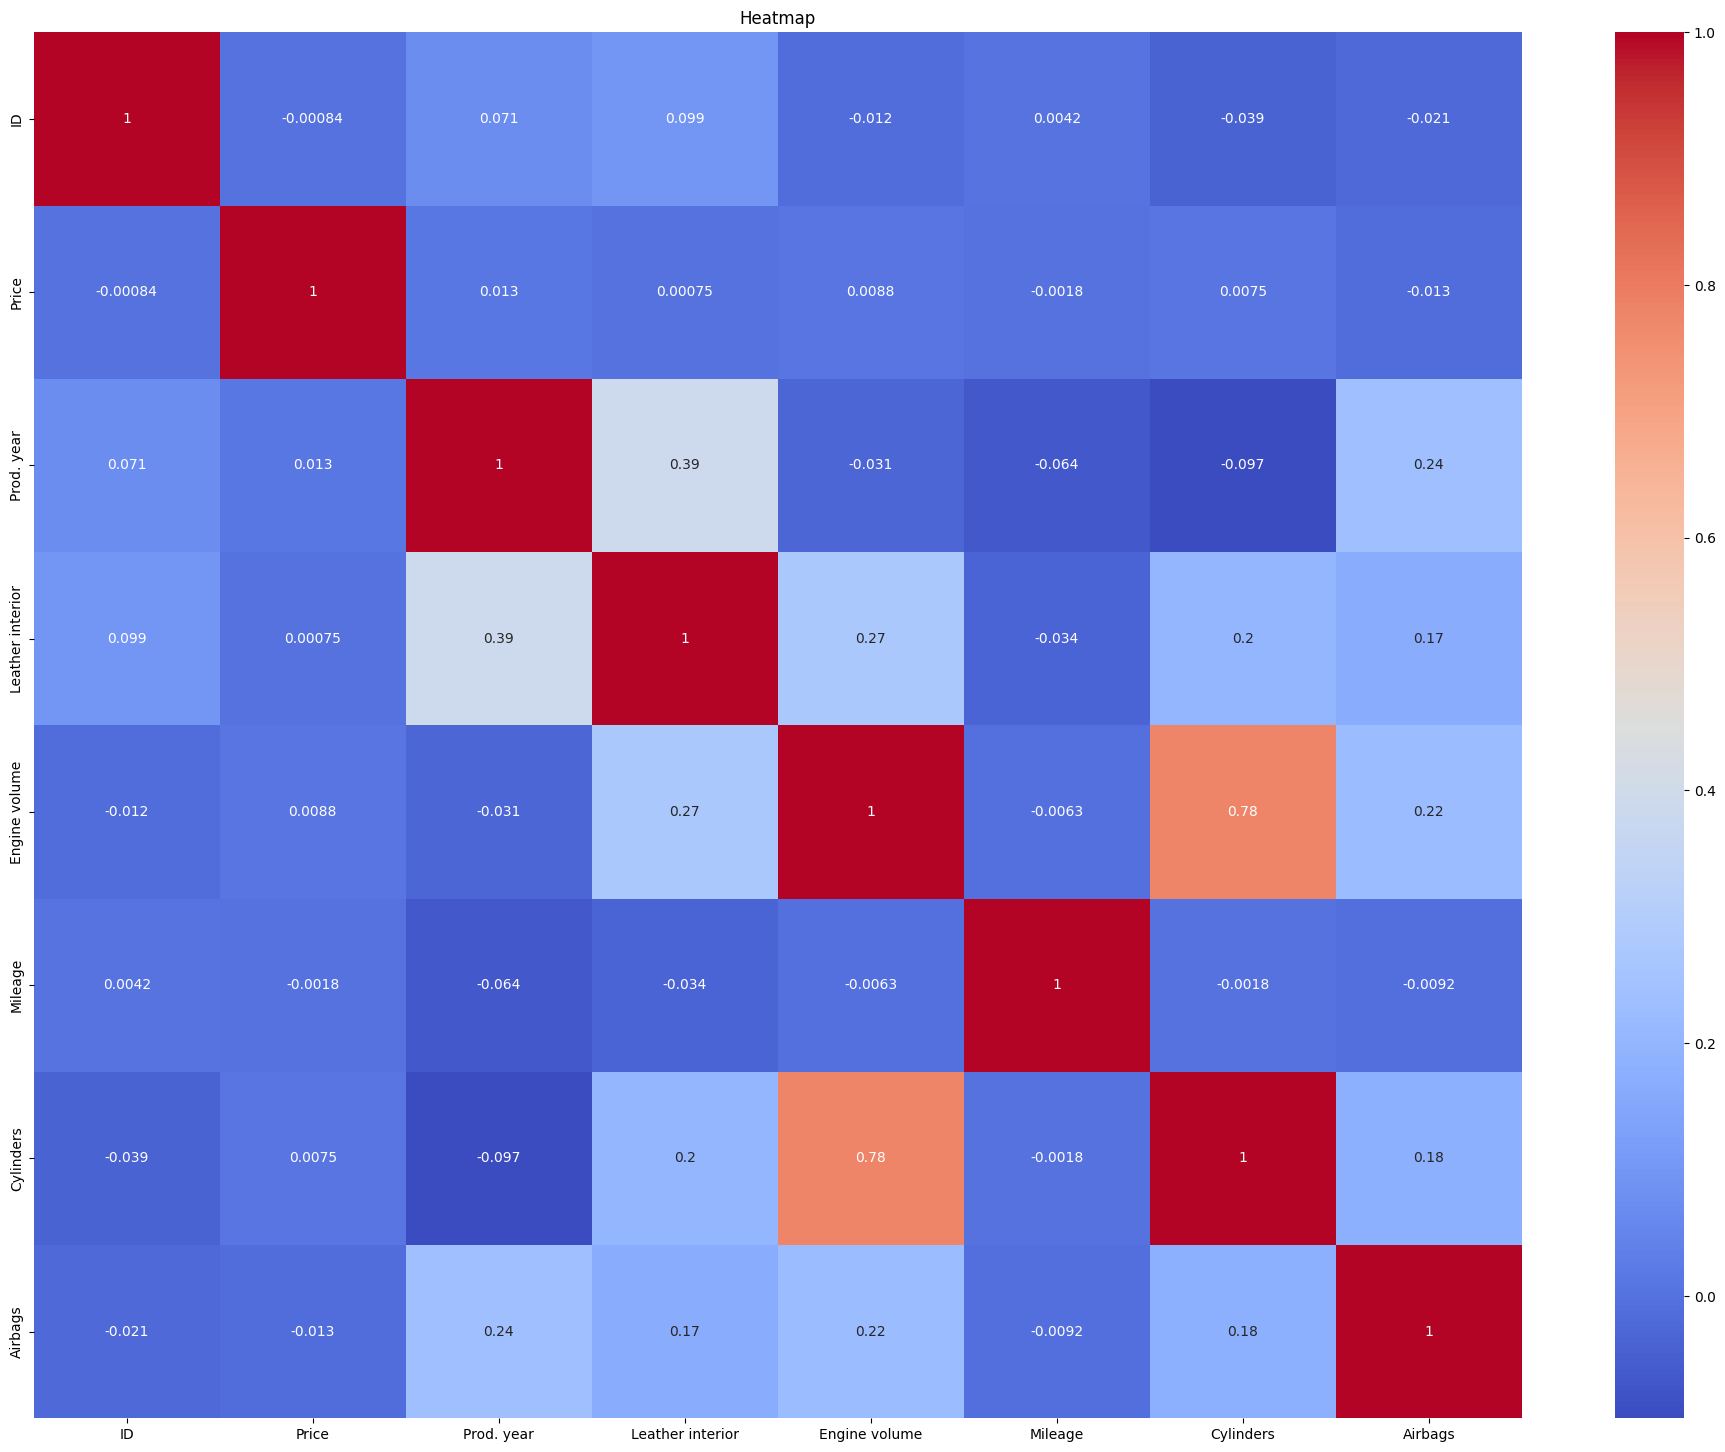

In [ ]:
plt.figure(figsize=(24, 18))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

This heatmap shows relation among different entitites

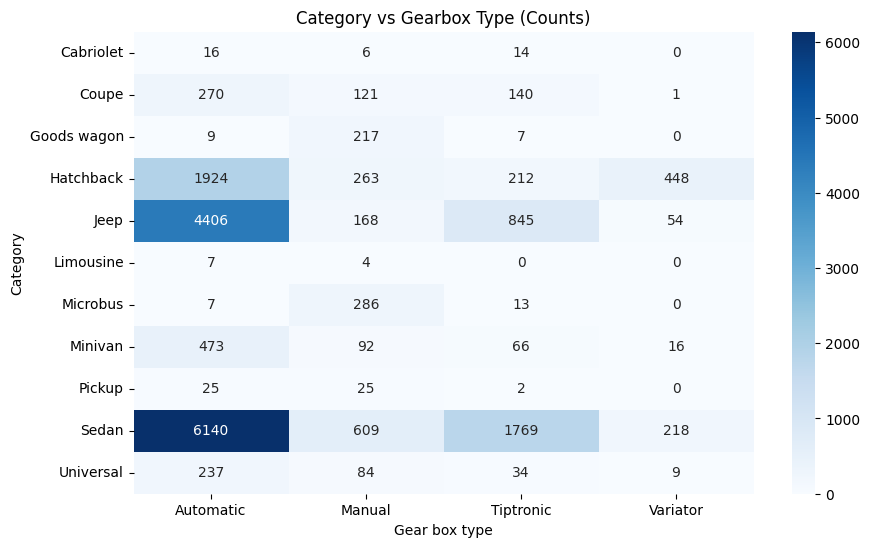

In [ ]:
heatmap_data = df.pivot_table(index='Category', columns='Gear box type', values='Fuel type', aggfunc='count').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues')
plt.title('Category vs Gearbox Type (Counts)')
plt.show()


This heatmap count shows that most sedans ,jeeps and hatchbacks are automatic.

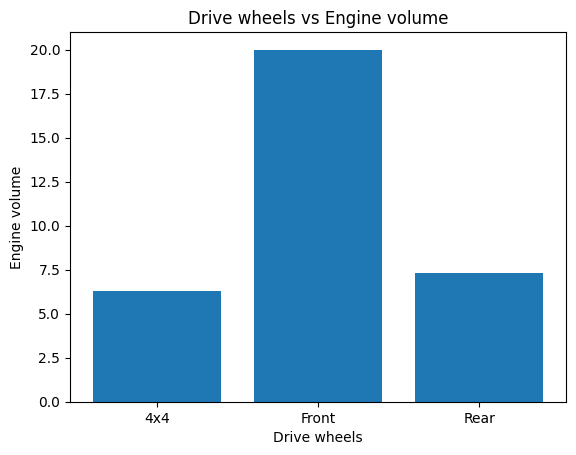

In [ ]:
plt.bar(df['Drive wheels'],df['Engine volume'])
plt.title('Drive wheels vs Engine volume')
plt.xlabel('Drive wheels')
plt.ylabel('Engine volume')
plt.show()

This bar graph tells that front-wheel cars usually have bigger engines than rear-wheel and 4x4 cars.

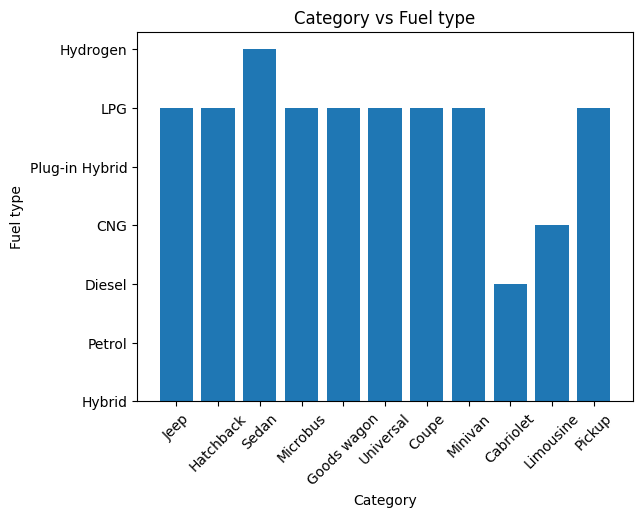

In [ ]:
plt.bar(df['Category'],df['Fuel type'])
plt.xticks(rotation=45)
plt.title('Category vs Fuel type')
plt.xlabel('Category')
plt.ylabel('Fuel type')
plt.show()

This bar chart shows that sedans mostly run on hydrogen, then cng is second most used , while mostly no vehicles work on hybrid.

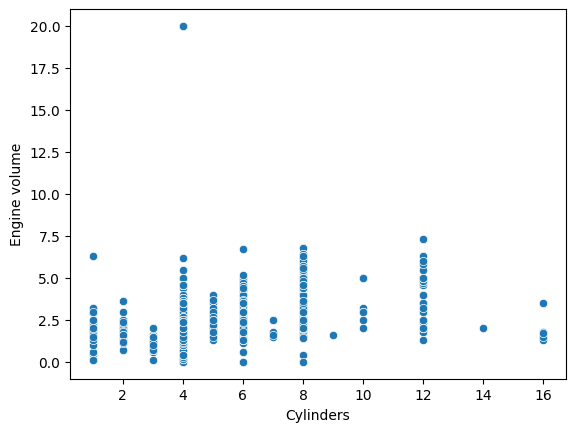

In [ ]:
sns.scatterplot(x='Cylinders', y='Engine volume', data=df)
plt.xlabel('Cylinders')
plt.ylabel('Engine volume')
plt.show()

This scatter plot helps us find relation between cylinders and engine volume

In [ ]:
df['Category'].value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


In [ ]:
df['Category']= df['Category'].replace({
    'Pickup':'Other',
    'Limousine': 'Other',
    'Cabriolet': 'Other',
    'Goods wagon': 'Other'
})

I did coupling of least frequency categories

In [ ]:
df['Levy']=df['Levy'].astype(int)
df['Total cost'] = df['Price'] + df['Levy']
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Total cost
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12,14727
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8,17639
2,45774419,8467,1018,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,9485
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,4469
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,12172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,1055,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4,Manual,Rear,Left wheel,Silver,5,9522
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4,Tiptronic,Front,Left wheel,Red,8,16512
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4,Automatic,Front,Left wheel,Grey,4,26944
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4,Automatic,Front,Left wheel,Black,4,6619


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <=(upper_bound))]


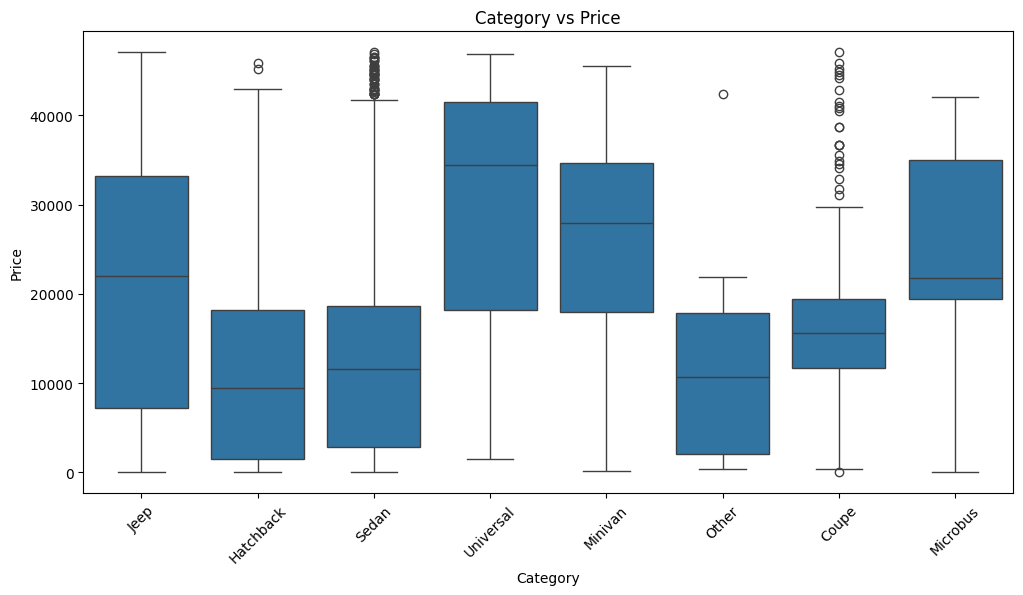

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Category vs Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

This boxplot shows that luxury cars cost more and have bigger price differences. Regular cars cost less and have similar prices.

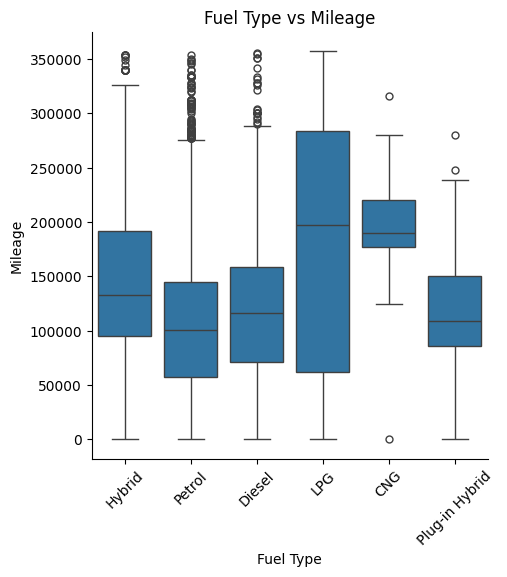

In [ ]:
sns.catplot(x='Fuel type', y='Mileage', data=df, kind='box')
plt.title('Fuel Type vs Mileage')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.xticks(rotation=45)
plt.show()


This plot tells that LPG can have a wide range of mileage, while hydrogen is constant mileage.

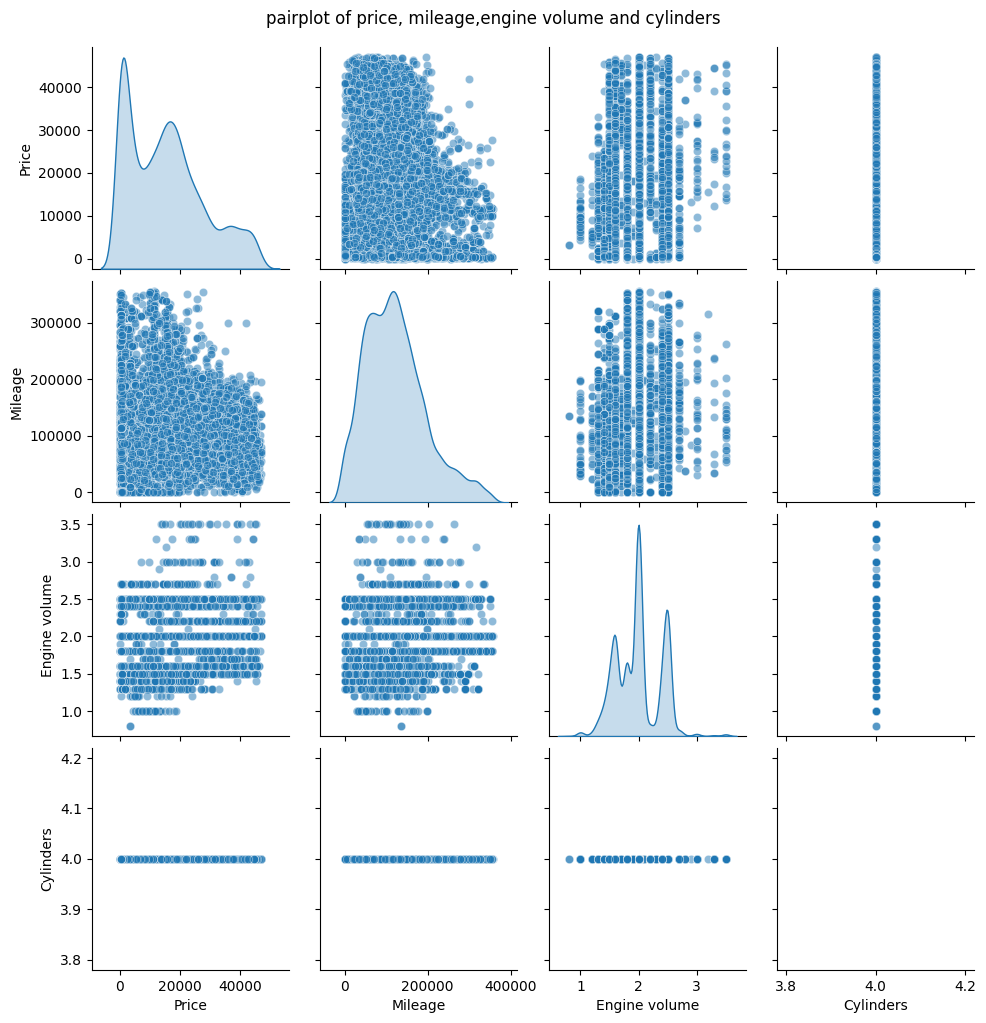

In [ ]:
sns.pairplot(df[['Price', 'Mileage', 'Engine volume', 'Cylinders']], diag_kind='kde',plot_kws={'alpha':0.5})
plt.suptitle('pairplot of price, mileage,engine volume and cylinders', y=1.02)
plt.show()

This pairplot is used to check any possible relation among entities

Train test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor( random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_encode = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Color', 'Drive wheels','Wheel']
for col in cols_to_encode:
    df[col + '_encoded'] = le.fit_transform(df[col])

In [ ]:
x = df[['Engine volume', 'Mileage', 'Cylinders', 'Levy', 'Airbags',
        'Category_encoded', 'Manufacturer_encoded', 'Model_encoded',
        'Fuel type_encoded', 'Gear box type_encoded', 'Wheel_encoded',
        'Color_encoded', 'Drive wheels_encoded', 'Leather interior','Prod. year']]
y = df['Price']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 41)

In [ ]:
x_train

,Engine volume,Mileage,Cylinders,Levy,Airbags,Category_encoded,Manufacturer_encoded,Model_encoded,Fuel type_encoded,Gear box type_encoded,Wheel_encoded,Color_encoded,Drive wheels_encoded,Leather interior,Prod. year
15261,2.5,82000,4,781,10,6,35,117,2,0,0,5,1,1,2012
11477,2.2,137986,4,971,4,2,14,343,1,0,0,12,1,1,2016
5304,1.5,146403,4,503,0,6,13,140,2,0,0,14,1,1,2012
3302,1.8,128297,4,730,4,1,20,106,2,0,0,3,1,1,2012
6977,2.4,53717,4,751,0,2,14,375,4,0,0,12,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,2.0,146740,4,640,4,2,14,343,1,0,0,7,1,1,2013
9933,1.5,130000,4,642,4,1,27,370,4,0,1,12,1,1,2005
9709,2.5,39552,4,607,12,6,35,117,2,0,0,1,1,1,2019
2232,2.5,69000,4,934,12,2,33,202,4,3,0,12,0,1,2015


In [ ]:
y_train

,Price
15261,24775
11477,43416
5304,2901
3302,28225
6977,3763
...,...
12703,37125
9933,8154
9709,251
2232,25500


In [ ]:
x_test

,Engine volume,Mileage,Cylinders,Levy,Airbags,Category_encoded,Manufacturer_encoded,Model_encoded,Fuel type_encoded,Gear box type_encoded,Wheel_encoded,Color_encoded,Drive wheels_encoded,Leather interior,Prod. year
4356,2.0,178000,4,730,4,2,18,358,1,0,0,12,1,1,2010
14731,1.8,0,4,353,0,1,20,106,2,0,0,7,1,1,2015
6545,1.3,205000,4,891,4,1,35,392,4,0,1,4,1,1,2007
14214,1.4,133195,4,259,0,2,5,393,2,0,0,1,1,1,2014
13311,1.4,138491,4,259,0,1,5,393,2,0,0,1,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17700,2.0,31102,4,890,4,6,18,288,4,0,0,1,1,1,2016
5344,1.5,105600,4,595,12,1,35,315,4,0,0,1,1,1,2015
18600,2.0,150000,4,642,4,6,14,350,3,0,0,1,1,1,2012
16146,2.0,239291,4,891,4,6,14,350,3,0,0,12,1,1,2016


In [ ]:
y_test

,Price
4356,23521
14731,31
6545,10036
14214,862
13311,3763
...,...
17700,20855
5344,6
18600,18211
16146,11290


Decision Trees Regressor

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_pred=tree.predict(x_test)

In [ ]:
tree_pred

array([24327.,    31.,  7370., ..., 23521., 15681., 13172.])

In [ ]:
y_test

,Price
4356,23521
14731,31
6545,10036
14214,862
13311,3763
...,...
17700,20855
5344,6
18600,18211
16146,11290


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, tree_pred)
mae = mean_absolute_error(y_test, tree_pred)
r2 = r2_score(y_test, tree_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 51602685.811233945
Mean Absolute Error: 3979.1979305004575
R2 Score: 0.6652162378343054


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=41)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=41)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, tree_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 26941128.080764774
Mean Absolute Error: 3979.1979305004575
R^2 Score: 0.825213512163688


In [ ]:
df.to_csv('cleaned_data.csv')